In [1]:
#Let's import the necessary libraries first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#Let's read the csv file first
data = pd.read_csv("master.csv")

In [3]:
#Let's see what we have in our data
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900.00,796.0,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900.00,796.0,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900.00,796.0,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900.00,796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900.00,796.0,Boomers


In [4]:
#Let's see the columns we have
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#Now let's see some statistics about our data
#Below are some summary of statistics for our data
print(data.describe())

               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.

In [6]:
data.shape

(27820, 12)

In [7]:
'''Upon lookin the null values we can see that almost 70% of the data
in "HDI for year" column is missing so we can drop this particular column
If the percentage is low we could use mean, median to replace the nulls with those values '''

((data.isnull().sum())*100)/27820


country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

In [8]:
# Drop the "HDI for year" column and store the remaining in a new dataframe "df"
df = data.drop(["HDI for year"], axis=1, )
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900.00,796.0,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900.00,796.0,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900.00,796.0,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900.00,796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900.00,796.0,Boomers


## Is the suicide rate more prominent in some age categories than others?


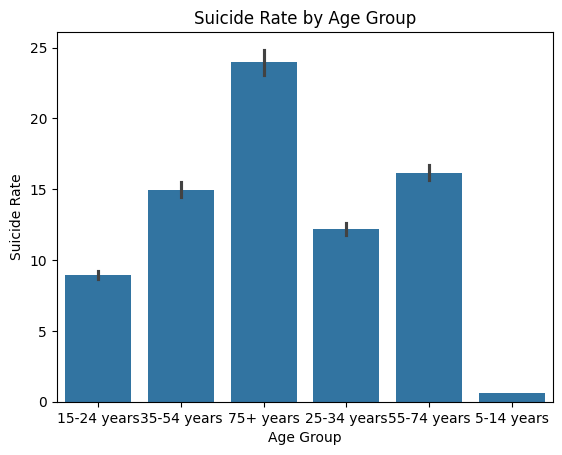

In [9]:
# Let's consider two variable for this
# first the suicide rate and secondly the age groups

#Barplot
x = df["age"]
y = df["suicides/100k pop"]

sns.barplot(data=df, x=x, y=y)
#plt.ylim(np.min(y), np.max(y))
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate by Age Group')
plt.show()




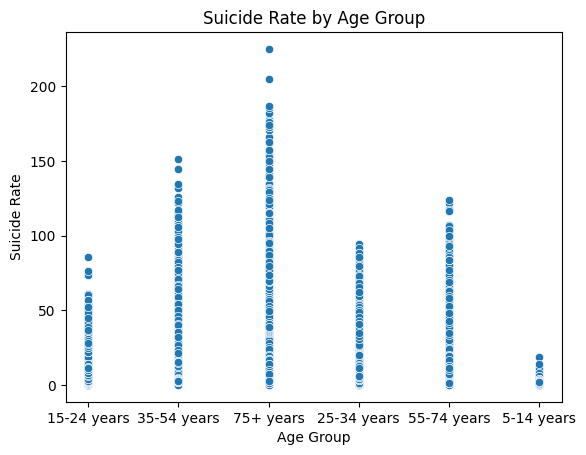

' It is quite evident from the plots that as the age-group increases the suicide rate also potentially \nincreases and the highest number of suicides being in the age group of people who are 75+'

In [10]:

#ScatterPlot
x = df["age"]
y = df["suicides/100k pop"]

sns.scatterplot(data=df, x=x, y=y)
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate by Age Group')
plt.show()

''' It is quite evident from the plots that as the age-group increases the suicide rate also potentially 
increases and the highest number of suicides being in the age group of people who are 75+'''

In [11]:
# Age = df['age'] == '15-24 years'
# np.average(Age)

In [12]:
# Age1= df['age']
# Age1 = Age1.value_counts
# print(Age1)

## Which countries have the most and the least number of suicides?


In [13]:
countries = df['country']
countries.head()
x = countries.value_counts()
np.max(x)


382

In [14]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900.00,796.0,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900.00,796.0,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900.00,796.0,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900.00,796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900.00,796.0,Boomers


In [15]:
new_df = df.loc[:, ['suicides_no', 'country']]
data = new_df['country'].unique()

total = 0
for i in data:
    print(i)
    total = total + 1
    
print("Total Countries are " + str(total))



Albania
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Barbados
Belarus
Belgium
Belize
Bosnia and Herzegovina
Brazil
Bulgaria
Cabo Verde
Canada
Chile
Colombia
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Dominica
Ecuador
El Salvador
Estonia
Fiji
Finland
France
Georgia
Germany
Greece
Grenada
Guatemala
Guyana
Hungary
Iceland
Ireland
Israel
Italy
Jamaica
Japan
Kazakhstan
Kiribati
Kuwait
Kyrgyzstan
Latvia
Lithuania
Luxembourg
Macau
Maldives
Malta
Mauritius
Mexico
Mongolia
Montenegro
Netherlands
New Zealand
Nicaragua
Norway
Oman
Panama
Paraguay
Philippines
Poland
Portugal
Puerto Rico
Qatar
Republic of Korea
Romania
Russian Federation
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and Grenadines
San Marino
Serbia
Seychelles
Singapore
Slovakia
Slovenia
South Africa
Spain
Sri Lanka
Suriname
Sweden
Switzerland
Thailand
Trinidad and Tobago
Turkey
Turkmenistan
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Uzbekistan
Total Cou

In [16]:
country_suicides = df.groupby('country')['suicides_no'].sum()
country_suicides



country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64

In [17]:
Max_suicides = country_suicides.idxmax()
country_suicides[Max_suicides]
Min_suicides = country_suicides.idxmin()

print("Country with the maximum number of suicides is " + Min_suicides + " with "+ str(country_suicides[Min_suicides]) + " suicides ")
print("Country with the maximum number of suicides is " + Max_suicides + " with "+ str(country_suicides[Max_suicides]) + " suicides ")

''' Russian Federation has the most number of suicides with 1209742 suicides from 1986-2016.
We can see that on average their were almost "39023" suicides in Russia in a year "
Suicides_no / total years (31) '''

Country with the maximum number of suicides is Dominica with 0 suicides 
Country with the maximum number of suicides is Russian Federation with 1209742 suicides 


' Russian Federation has the most number of suicides with 1209742 suicides from 1986-2016.\nWe can see that on average their were almost "39023" suicides in Russia in a year "\nSuicides_no / total years (31) '

## What is the effect of the population on suicide rates?

In [18]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900.00,796.0,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900.00,796.0,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900.00,796.0,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900.00,796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900.00,796.0,Boomers


In [19]:
x = df['population']
y = df['suicides/100k pop']

correlation= stats.pearsonr(y, x)
correlation[0]

#Firstly by looking at the correlation we can deduce that the population has a very
#weak positive impact on the suicide rate. Now let's see some graph to understand better '''

0.008284973053478372

In [20]:
total_population_by_country = df.groupby('country')['population'].sum()

# Print the result
print(total_population_by_country)


country
Albania                   62325467
Antigua and Barbuda        1990228
Argentina               1035985431
Armenia                   77348173
Aruba                      1259677
                           ...    
United Arab Emirates      36502275
United Kingdom          1738767780
United States           8054027201
Uruguay                   84068943
Uzbekistan               486422532
Name: population, Length: 101, dtype: int64


In [21]:
correlation_matrix = df[['population', 'suicides/100k pop']].corr()
correlation_matrix

,population,suicides/100k pop
population,1.000000,0.008285
suicides/100k pop,0.008285,1.000000


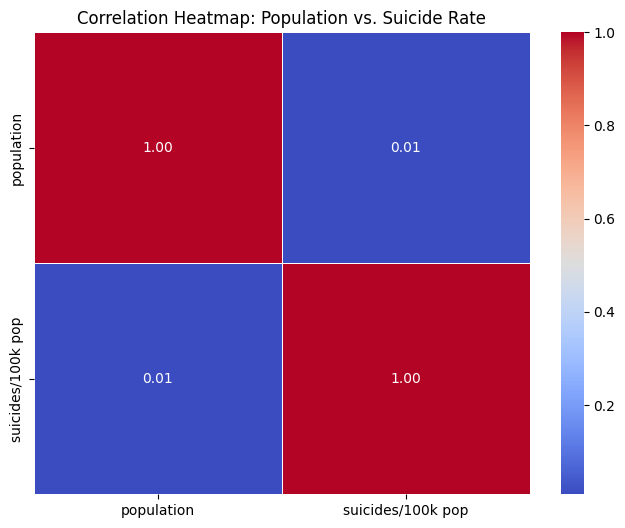

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Population vs. Suicide Rate')
plt.show()


In [23]:
''' By looking at the heatmap it is quite prominent that there is no such relation between
population and suicide rate. We can deduce that higher or lower population has no substantial
affect on the suicide rate '''

' By looking at the heatmap it is quite prominent that there is no such relation between\npopulation and suicide rate. We can deduce that higher or lower population has no substantial\naffect on the suicide rate '

## What is the effect of the GDP of a country on suicide rates?


In [24]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900.00,796.0,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900.00,796.0,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900.00,796.0,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900.00,796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900.00,796.0,Boomers


In [25]:
''' we have two ways to check the effect of GDP of the suicide rate.
As our main aim is too see how gdp affects suicide rate so I'll here take gdp per
capita column as it accounts for individual prosperity and standard of living.'''

x = df['gdp_per_capita ($)']
y = df['suicides/100k pop']

correlation= stats.pearsonr(x, y)
correlation[0]



0.0017851337973441954

In [26]:
correlation_matrix = df[['gdp_per_capita ($)', 'suicides/100k pop']].corr()
correlation_matrix

#Firstly by looking at the correlation we can deduce that the population has a very
#weak positive impact on the suicide rate. Now let's see some graph to understand better 

,gdp_per_capita ($),suicides/100k pop
gdp_per_capita ($),1.000000,0.001785
suicides/100k pop,0.001785,1.000000


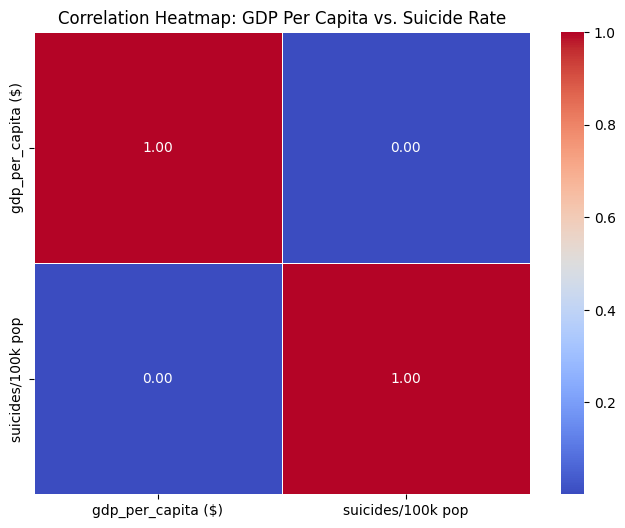

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: GDP Per Capita vs. Suicide Rate')
plt.show()

# From the heatmap it is quite evident that GPD per capita has no effect on suicide rate

## What is the trend of suicide rates across all the years?

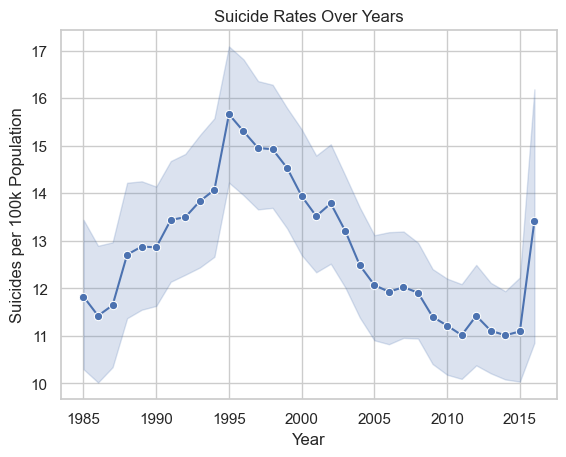

In [30]:
x = df['year']
y = df['suicides/100k pop']

sns.set(style="whitegrid") 
sns.lineplot(x=x, y=y, data=df, marker='o', color='b')

plt.title('Suicide Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')

plt.show()

# Here we can see the suicide rate kept increasing from the late 1980's to reaching it's peak in 1985.
# We then see a drop in it over the years till 2015, after which in again starts to increase!

In [33]:
# # Let's now use suicide_no to see the trend according to the number of suicides
# x = df['year']
# y = df['suicides_no']

# sns.set(style="whitegrid") 
# sns.lineplot(x=x, y=y, data=df, marker='o', color='b')

# plt.title('Suicide Rates Over Years')
# plt.xlabel('Year')
# plt.ylabel('Suicides per 100k Population')

# plt.show()



## Is there a difference between the suicide rates of men and women?

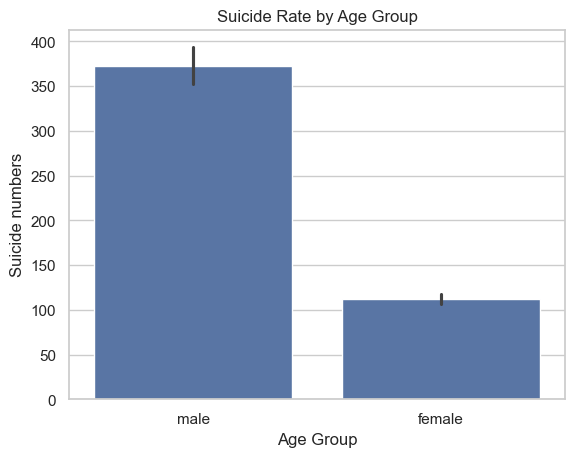

In [44]:
x = df['sex']
y = df['suicides_no']

#Let's use a barplot to see the results

sns.barplot(data=df, x=x, y=y)
#plt.ylim(np.min(y), np.max(y))
plt.xlabel('Age Group')
plt.ylabel('Suicide numbers')
plt.title('Suicide Rate by Age Group')
plt.show()



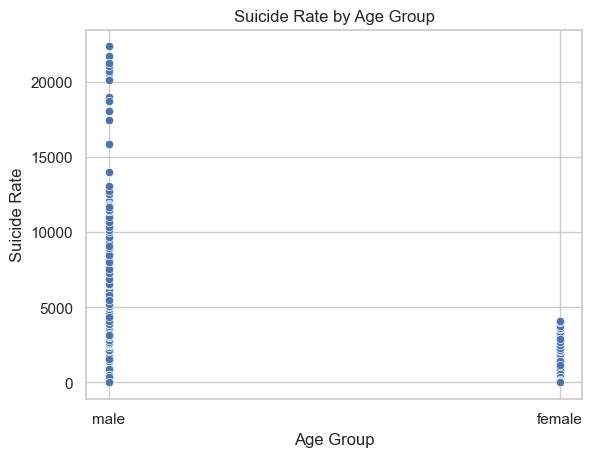

In [46]:
# Now let's see the results with a scatterplot

sns.scatterplot(data=df, x=x, y=y)
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate by Age Group')
plt.show()

# The scatterplot clearly shows that men tend to have a very high suicide rate in comparison to the females.
# It shows to prove the point that sex has a definite effect on the suicide rate.